## Reading and Plotting Stock Information

In [31]:
# Import modules
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
import os
import numpy as np

#### Lesson 01-01

In [5]:
# Import AAPL stock data
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2017, 1, 1)
dframe = web.DataReader('AAPL', 'google', start, end)
dframe.to_csv("data/AAPL.csv", index_label="Date")

In [6]:
# Read data from CSV and print first 5 rows
df = pd.read_csv("data/AAPL.csv")
print(df.head())

         Date   Open   High    Low  Close     Volume
0  2010-01-04  30.49  30.64  30.34  30.57  123432050
1  2010-01-05  30.66  30.80  30.46  30.63  150476004
2  2010-01-06  30.63  30.75  30.11  30.14  138039594
3  2010-01-07  30.25  30.29  29.86  30.08  119282324
4  2010-01-08  30.04  30.29  29.87  30.28  111969081


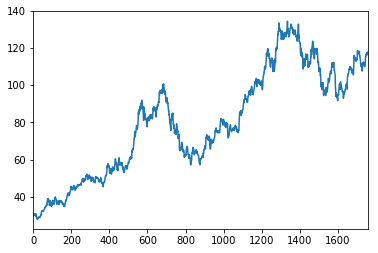

In [19]:
#Plot High price
df['High'].plot()
plt.show()

## Joining two stock Information
#### Lesson 01-02

In [20]:
# Specify date range using pandas range
start_date = '2010-01-22'
end_date = '2010-01-26'
dates = pd.date_range(start_date, end_date)

# Create empty dataFrame
df1 = pd.DataFrame(index=dates)

In [21]:
# Join two dataframe
df1 = df1.join(df)
print(df1)

                    Date  Open  High  Low  Close  Volume
2010-01-22 00:00:00  NaN   NaN   NaN  NaN    NaN     NaN
2010-01-23 00:00:00  NaN   NaN   NaN  NaN    NaN     NaN
2010-01-24 00:00:00  NaN   NaN   NaN  NaN    NaN     NaN
2010-01-25 00:00:00  NaN   NaN   NaN  NaN    NaN     NaN
2010-01-26 00:00:00  NaN   NaN   NaN  NaN    NaN     NaN


In [22]:
# Above shows all NaN as AAPL stock data is read without date as index.
# We can read again with correct format
df = pd.read_csv("data/AAPL.csv", index_col="Date", parse_dates=True)
print(df.head())

             Open   High    Low  Close     Volume
Date                                             
2010-01-04  30.49  30.64  30.34  30.57  123432050
2010-01-05  30.66  30.80  30.46  30.63  150476004
2010-01-06  30.63  30.75  30.11  30.14  138039594
2010-01-07  30.25  30.29  29.86  30.08  119282324
2010-01-08  30.04  30.29  29.87  30.28  111969081


In [27]:
# Now join again and print out
df1 = None
df1 = pd.DataFrame(index=dates)
df1 = df1.join(df)
print(df1)

             Open   High    Low  Close       Volume
2010-01-22  29.54  29.64  28.17  28.25  220441872.0
2010-01-23    NaN    NaN    NaN    NaN          NaN
2010-01-24    NaN    NaN    NaN    NaN          NaN
2010-01-25  28.93  29.24  28.60  29.01  266424802.0
2010-01-26  29.42  30.53  28.94  29.42  466777486.0


In [28]:
# Let's remove row with has NaN
df1 = df1.dropna()
print(df1)

             Open   High    Low  Close       Volume
2010-01-22  29.54  29.64  28.17  28.25  220441872.0
2010-01-25  28.93  29.24  28.60  29.01  266424802.0
2010-01-26  29.42  30.53  28.94  29.42  466777486.0


In [ ]:
# Note that above two operation can be done by following command
# df1 = df1.join(df, how='inner')

### Example: Create Stock information using Close

In [29]:
# First, let's download stock information
tickers = ['AAPL', 'SPY', 'IBM', 'GOOG', 'GLD']
for ticker in tickers:
    df = web.DataReader(ticker, 'google', start, end)
    df.to_csv("data/{}.csv".format(ticker), index_label="Date")

In [30]:
# Create dataframe with wanted date range
df1 = None
df1 = pd.DataFrame(index=dates)

In [32]:
# Join all stock information
for ticker in tickers:
    df_temp = pd.read_csv("data/{}.csv".format(ticker), index_col='Date',
                         parse_dates=True, usecols=['Date', 'Close'],
                         na_values=['nan'])
    # Rename
    df_temp = df_temp.rename(columns={'Close': ticker})
    df1 = df1.join(df_temp)
print(df1)

             AAPL     SPY     IBM    GOOG     GLD
2010-01-22  28.25  109.21  125.50  274.73  107.17
2010-01-23    NaN     NaN     NaN     NaN     NaN
2010-01-24    NaN     NaN     NaN     NaN     NaN
2010-01-25  29.01  109.77  126.12  269.73  107.48
2010-01-26  29.42  109.31  125.75  270.94  107.56


### Utility Function to read data

In [8]:
# This function provides path to cvc for specified symbol
# If symbol is not available, then read from internet, save, then provide
# path
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV path to specified symbol"""
    if not os.path.exists(os.path.join(base_dir, "{}.csv".format(str(symbol)))):
        start = dt.datetime(2010, 1, 1)
        end = dt.datetime(2017, 1, 1)
        df = web.DataReader(symbol, 'google', start, end)
        df.to_csv(os.path.join(base_dir,"{}.csv".format(str(symbol))))
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

In [14]:
# Test Function
# Case 1: Existing one (AAPL)
ex_path = symbol_to_path('AAPL')
print(ex_path)
# Case 2: Not existing one (HOLX)
ex_path = symbol_to_path('HOLX')
print(ex_path)
os.remove(ex_path)

data\AAPL.csv
data\HOLX.csv


In [15]:
def get_data(symbols, dates):
    """Read stock data (close) for given symbols for given period of time"""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        temp_df = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                         parse_dates=True, usecols=['Date', 'Close'],
                         na_values=['nan'])
        temp_df = temp_df.rename(columns={'Close': symbol})
        df = df.join(temp_df, how='inner')
    return df

In [18]:
# Test function
# Define a date range
dates = pd.date_range('2010-01-1', '2010-12-31')
# Choose stock symbols to read
symbols = ['GOOG', 'IBM', 'GLD']
# Get stock data
df = get_data(symbols, dates)
print(df)

               SPY    GOOG     IBM     GLD
2010-01-04  113.33  313.06  132.45  109.80
2010-01-05  113.63  311.68  130.85  109.70
2010-01-06  113.71  303.83  130.00  111.51
2010-01-07  114.19  296.75  129.55  110.82
2010-01-08  114.57  300.71  130.85  111.37
2010-01-11  114.73  300.25  129.48  112.85
2010-01-12  113.66  294.94  130.51  110.49
2010-01-13  114.62  293.25  130.23  111.54
2010-01-14  114.93  294.63  132.31  112.03
2010-01-15  113.64  289.71  131.78  110.86
2010-01-19  115.06  293.52  134.14  111.52
2010-01-20  113.89  289.91  130.25  108.94
2010-01-21  111.70  291.20  129.00  107.37
2010-01-22  109.21  274.73  125.50  107.17
2010-01-25  109.77  269.73  126.12  107.48
2010-01-26  109.31  270.94  125.75  107.56
2010-01-27  109.83  270.78  126.33  106.53
2010-01-28  108.57  266.88  123.75  106.48
2010-01-29  107.39  264.71  122.39  105.96
2010-02-01  109.06  266.24  124.67  108.35
2010-02-02  110.38  265.29  125.53  109.13
2010-02-03  109.83  270.14  125.66  108.70
2010-02-04 

In [27]:
# Plot data
def plot_data(df, title="Stock prices"):
    """Plot stock prices"""
    ax = df.plot(title=title, fontsize=10)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

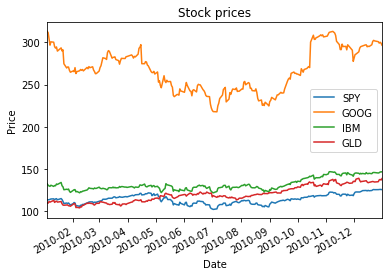

In [28]:
plot_data(df)

In [29]:
def plot_selected(df, columns, start_index, end_index):
    """Plot selected symbols over selected time"""
    plot_data(df.ix[start_index:endIindex, columns], title="Selected Data")

In [30]:
def normalize_data(df):
    """Normalize stock price using first row"""
    return df / df.ix[0,:]

### Power of NumPy
#### Lesson 01-03

In [40]:
# Basic notation
#nd1[row, col]
#nd1[row_start:row_end,col_start:col_end]
# By using just ":", it means all row or col
# Last row can be expressed with "-1" (Cound back from END)

# Create array
print(np.array([(2, 3, 4),(5, 6, 7)]))

[[2 3 4]
 [5 6 7]]


In [41]:
# Create empty array
print(np.empty((5, 4)))

[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


In [42]:
# Create array with ones
print(np.ones((5, 4)))

[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


In [43]:
# Note that default np array is float
# To make it int
print(np.ones((5, 4), dtype=np.int_))

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


In [44]:
# Generate random value
print( np.random.random((5, 4)) )

[[ 0.46163906  0.21033856  0.82623527  0.96897351]
 [ 0.64447021  0.59058855  0.814951    0.81412935]
 [ 0.46831156  0.63166136  0.42533143  0.25373385]
 [ 0.05693656  0.68959877  0.63700525  0.02199853]
 [ 0.96069547  0.72629867  0.05438769  0.85278467]]


In [47]:
# You can also generate using following syntax
a = np.random.rand(5, 4)
print( a )

[[ 0.25674456  0.28631179  0.15695239  0.26711271]
 [ 0.99786358  0.99164136  0.71512907  0.34610357]
 [ 0.51646401  0.16904027  0.07775686  0.11113459]
 [ 0.58819472  0.18587957  0.81537397  0.87604589]
 [ 0.12986644  0.30689693  0.45688478  0.05361411]]


In [50]:
# Show the shape of array
print(a.shape)
# Number of row
print(a.shape[0])
# Number of col
print(a.shape[1])

(5, 4)
5
4


In [52]:
# Get number of elements
print(a.size)

20


Array Operations

In [57]:
print( "Sum of array elements: ", a.sum())
print( "Sum of each col: ", a.sum(axis=0))
print( "Sum of each row: ", a.sum(axis=1))

Sum of array elements:  8.30501118259
Sum of each col:  [ 2.48913331  1.93976992  2.22209708  1.65401087]
Sum of each row:  [ 0.96712145  3.05073758  0.87439573  2.46549415  0.94726227]
